In [2]:
#import mmf_setup;mmf_setup.nbinit()
%load_ext autoreload

In [3]:
%pylab inline --no-import-all
%autoreload

import figure_style
from figure_style import Paper

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    y = np.sin((2 * np.pi) * frequencies)
    return x, y


class PaperFigures(Paper):
    style = "nature"
    #style = 'arXiv'
    #style = "none"

    SAMPLE_RATE = 44100
    DURATION = 10

    def __init__(self, **kw):
        super().__init__(**kw)
        _, nice_tone = generate_sine_wave(freq = 2, sample_rate=self.SAMPLE_RATE, duration = self.DURATION)
        _, noise_tone_100 = generate_sine_wave(freq = 20, sample_rate = self.SAMPLE_RATE, duration = self.DURATION)

        noise_tone_100 = noise_tone_100 * 0.4
        self.noisy_tone = nice_tone  + noise_tone_100
        self.nice_tone = nice_tone
        print (len(nice_tone))

    def fig_demo(self):
        myfig = self.figure(
            num=0,  # If you want to redraw in the same window
            width="textwidth",  # For two-column documents, vs. 'textwidth'
            height=0.3,   # Fraction of width
            constrained_layout=True,
            #margin_factors=dict(top=0, left=0, bot=0, right=0),
        )
        ax = plt.gca()
        # ax.plot(nice_tone[:10000], '-r', label = 'nice tone')
        ax.plot(self.noisy_tone, '-r', label='noisy signal')
        ax.plot(self.nice_tone, '-', label='true signal', c='k')

        ax.set_xlabel('t')
        ax.set_ylabel('magnitude')
        ax.legend(loc="best")
        ax.grid(True);
        return myfig

Populating the interactive namespace from numpy and matplotlib


441000
Drawing figure: fig_demo()
Saving plot as _build/figures/nature/demo.pdf...
Saving plot as _build/figures/nature/demo.pdf. Done.


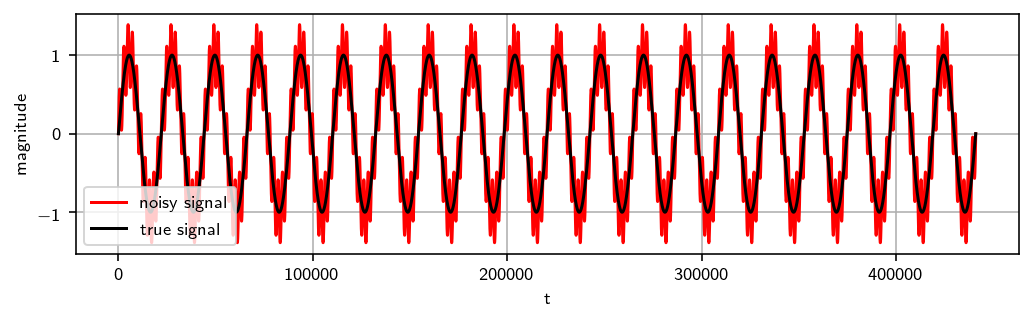

In [4]:
f = PaperFigures()
#f.fig_demo()
f.draw('fig_demo')

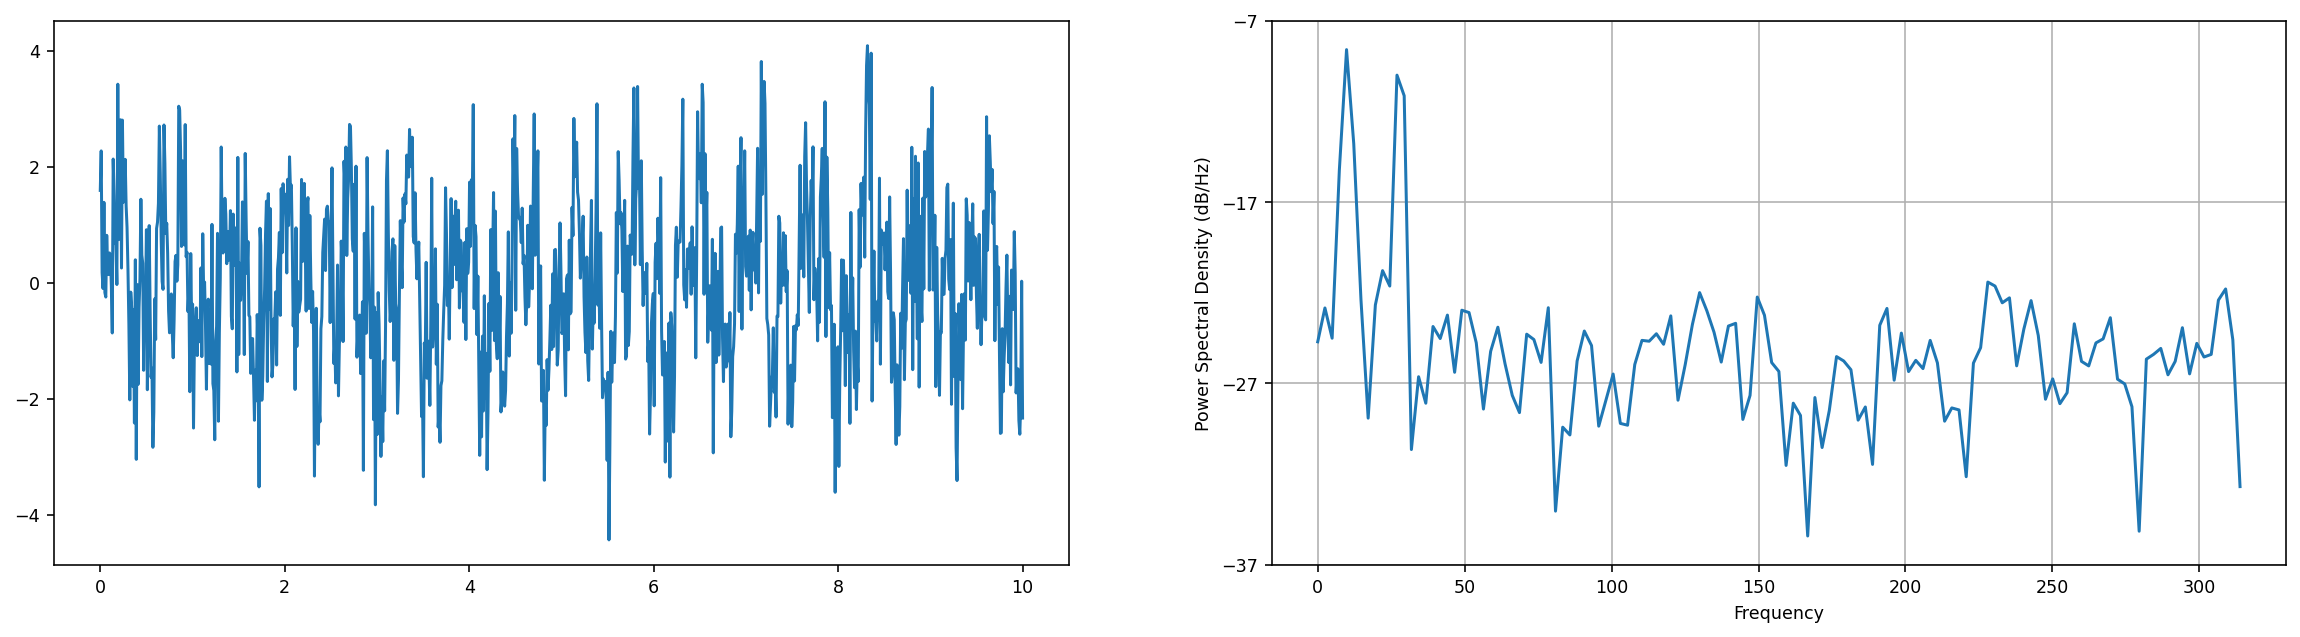

In [11]:
plt.rcParams['text.usetex'] = False
x = np.linspace(0, 10, 1000)
dx = np.diff(x).mean()
y = np.sin(10*x) + np.cos(28*x)
y += np.random.normal(size=len(x))
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(x, y)
plt.subplot(122)
plt.psd(y, Fs=1/dx*2*np.pi);  # Fs is WRONG.


In [59]:
%timeit np.fft.rfft(y)
%timeit np.fft.fft(y)

12.3 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
20.8 µs ± 2.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [0]:
np.fft.rfft?

ValueError: x and y must have same first dimension, but have shapes (500,) and (501,)

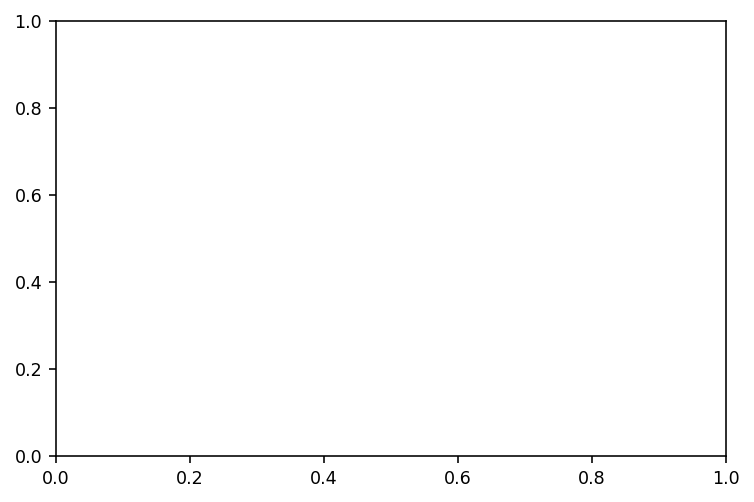

In [63]:
k = 2*np.pi * np.fft.fftfreq(len(x), d=dx)[:len(x)//2]
#plt.plot(k, abs(np.fft.rfft(y)), '-+')
#plt.plot(np.fft.fftshift(k), np.fft.fftshift(abs(np.fft.rfft(y))), '-+')

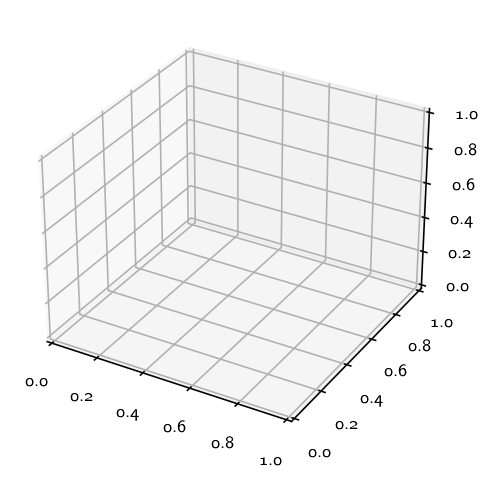

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

/ext/anaconda2020.02/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


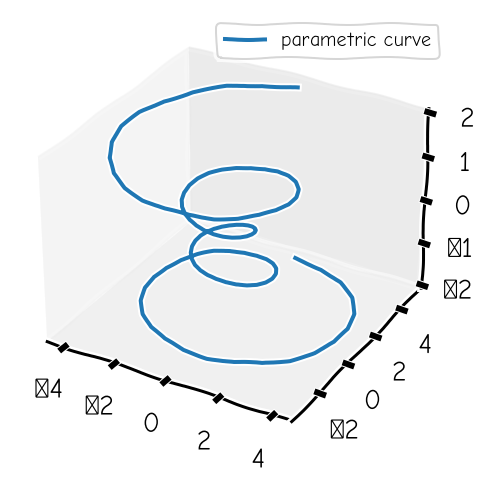

In [4]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

with plt.xkcd():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
    z = np.linspace(-2, 2, 100)
    r = z**2 + 1
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    ax.plot(x, y, z, label='parametric curve')
    ax.legend()
    ax.annotate('local max', xy=(3, 1),  xycoords='data',

/ext/anaconda2020.02/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


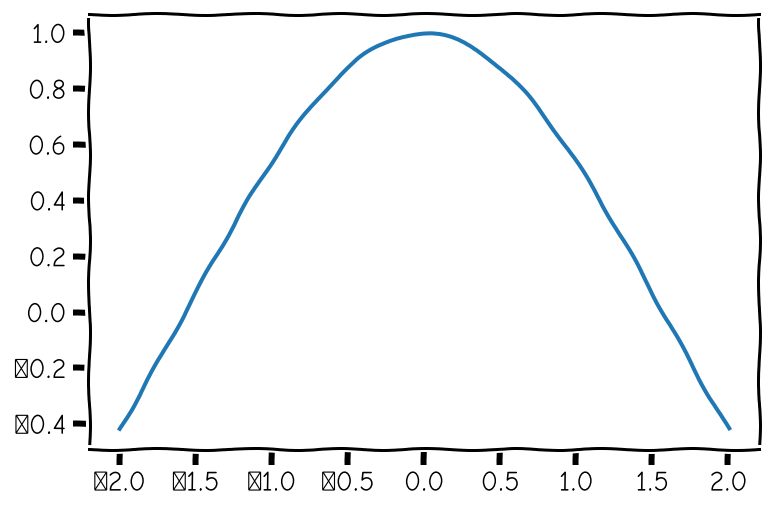

In [6]:
with plt.xkcd():
    x = np.linspace(-2,2,100)
    y = np.cos(x)
    plt.plot(x, y)